# Syllabus

Apply advanced data manipulation techniques such as merging, joining, and reshaping data frames.

# Zusammenführen von DataFrames

## Merging

**Merging** kombiniert DataFrames basierend auf gemeinsamen Spalten und ist vergleichbar mit einem SQL-Join.<br>

### einfaches Mergen

Hier wird ein **inner join** durchgeführt, d.h. nur die Zeilen mit gemeinsamen `ID`s werden beibehalten. Andere Join-Optionen wären 
- **left**
- **right**
- **outer**

In [29]:
import pandas as pd

# Erstellen zweier DataFrames
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Name': ['Anna', 'Ben', 'Clara', 'David']
})

df2 = pd.DataFrame({
    'ID': [3, 4, 5, 6],
    'Score': [85, 90, 95, 80]
})

# Merging (inner join)
merged_df_a = pd.merge(df1, df2, on='ID', how='inner')
merged_df_a

,ID,Name,Score
0,3,Clara,85
1,4,David,90


### Merging mit mehreren Schlüsselspalten

In diesem Beispiel führen wir das **Merging** über zwei Schlüsselspalten durch: Vorname und Nachname.

In [30]:
import pandas as pd

# DataFrame 1
df3 = pd.DataFrame({
    'Vorname': ['Anna', 'Ben', 'Clara', 'David'],
    'Nachname': ['Müller', 'Schmidt', 'Fischer', 'Weber'],
    'Alter': [28, 34, 29, 40]
})

# DataFrame 2
df4 = pd.DataFrame({
    'Vorname': ['Anna', 'Ben', 'Clara', 'Elias'],
    'Nachname': ['Müller', 'Schmidt', 'Fischer', 'Klein'],
    'Einkommen': [45000, 55000, 47000, 60000]
})

# Merge anhand von Vor- und Nachname
merged_df_b = pd.merge(df3, df4, on=['Vorname', 'Nachname'], how='inner')
merged_df_b

,Vorname,Nachname,Alter,Einkommen
0,Anna,Müller,28,45000
1,Ben,Schmidt,34,55000
2,Clara,Fischer,29,47000


### Many-to-Many-Merge

Es gibt Fälle, in denen ein DataFrame mehrere gleiche Schlüsselwerte hat, was zu einem **Many-to-Many-Merge** führt.

Hier führen wir ein **Many-to-Many-Merge** durch, bei dem jede Kombination von ID-Werten aus beiden DataFrames beibehalten wird.

In [31]:
# Many-to-Many Beziehung
df5 = pd.DataFrame({
    'Student_ID': [1, 2, 2, 3],
    'Kurs': ['Mathe', 'Englisch', 'Biologie', 'Physik']
})

df6 = pd.DataFrame({
    'Student_ID': [1, 2, 2, 4],
    'Note': ['A', 'B', 'C', 'A']
})

# Merge (inner join)
merged_df_c = pd.merge(df5, df6, on='Student_ID', how='inner')
merged_df_c

,Student_ID,Kurs,Note
0,1,Mathe,A
1,2,Englisch,B
2,2,Englisch,C
3,2,Biologie,B
4,2,Biologie,C


## Concat (Aneinanderhängen)

In [32]:
df7 = pd.DataFrame({'Vorname': ['David'], 'Nachname': ['Weber'], 'Alter': [35], 'Einkommen': [45000]})
concat_df = pd.concat([merged_df_b, df7], ignore_index=True)
concat_df

,Vorname,Nachname,Alter,Einkommen
0,Anna,Müller,28,45000
1,Ben,Schmidt,34,55000
2,Clara,Fischer,29,47000
3,David,Weber,35,45000


## Joining (Verbinden von DataFrames)

### einfaches Joinen

**Joining** verbindet DataFrames anhand ihrer Indizes.<br>
Hierbei können auch andere Joins verwendet werden:
- left
- right
- inner
- outer

Hier wird ein **left join** verwendet, bei dem alle Zeilen aus dem linken DataFrame (df8) beibehalten werden, auch wenn sie keinen entsprechenden Eintrag im rechten DataFrame (df9) haben.

In [33]:
df8 = pd.DataFrame({
    'Name': ['Anna', 'Ben', 'Clara', 'David'],
    'Score': [80, 90, 85, 95]
}, index=[1, 2, 3, 4])

df9 = pd.DataFrame({
    'Age': [23, 25, 30, 22]
}, index=[1, 2, 3, 5])

# Join (left join)
joined_df_a = df8.join(df9, how='left')
joined_df_a

,Name,Score,Age
1,Anna,80,23.0
2,Ben,90,25.0
3,Clara,85,30.0
4,David,95,NaN


## Hierarchische Indizes

Hier wird ein **MultiIndex** verwendet, um die Daten zu organisieren und zu verbinden. Dies ist besonders nützlich für hierarchische Datenstrukturen.

In [34]:
df10 = pd.DataFrame({
    'Stadt': ['Berlin', 'Berlin', 'Hamburg', 'Hamburg'],
    'Jahr': [2020, 2021, 2020, 2021],
    'Bevölkerung': [3.5, 3.6, 1.8, 1.85]
}).set_index(['Stadt', 'Jahr'])

df11 = pd.DataFrame({
    'Stadt': ['Berlin', 'Berlin', 'Hamburg', 'Hamburg'],
    'Jahr': [2020, 2021, 2020, 2021],
    'Fläche': [891.8, 891.8, 755.2, 755.2]
}).set_index(['Stadt', 'Jahr'])

# Join basierend auf MultiIndex
joined_df_b = df10.join(df11)
joined_df_b

Bevölkerung  Fläche
Stadt   Jahr                     
Berlin  2020         3.50   891.8
        2021         3.60   891.8
Hamburg 2020         1.80   755.2
        2021         1.85   755.2

# Reshaping (Umformen von DataFrames)


## Pivoting

Das Pivoting in Pandas ist eine Technik zur Neugestaltung eines DataFrames, bei der die Daten in eine breitere Form gebracht werden, indem bestimmte Spalten als Index verwendet werden und andere als Spaltenüberschriften. Es ist nützlich, um Daten in einer tabellenähnlichen Struktur darzustellen, in der Kategorien (z.B. "Jahr" oder "Monat") als Spalten verwendet werden und die Werte in den entsprechenden Zellen eingefügt werden.

Angenommen, wir haben eine Tabelle, die Verkäufe pro Region und Produkt anzeigt, und wir möchten die Daten umstrukturieren.
Hier wurde die Region als Index und das Produkt als Spalten verwendet, um die Verkaufsdaten übersichtlich zu organisieren.


In [35]:
data = {
    'Region': ['Nord', 'Nord', 'Süd', 'Süd'],
    'Produkt': ['A', 'B', 'A', 'B'],
    'Verkäufe': [100, 150, 200, 250]
}
df12 = pd.DataFrame(data)

pivot_df_a = df12.pivot(index='Region', columns='Produkt', values='Verkäufe')
pivot_df_a

Produkt,A,B
Region,,
Nord,100,150
Süd,200,250


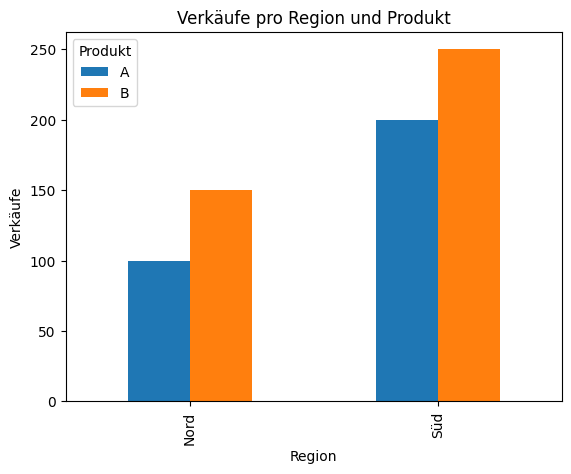

In [36]:
import matplotlib.pyplot as plt

pivot_df_a.plot(kind='bar')
plt.title('Verkäufe pro Region und Produkt')
plt.ylabel('Verkäufe')
plt.show()

Beispiel

Wir haben einen DataFrame, der die Verkaufszahlen von Produkten in verschiedenen Städten
für verschiedene Monate enthält. Wir wollen diesen DataFrame so umzuwandeln,
dass wir eine Übersicht erhalten, in der die Städte die Spalten darstellen und die Monate die Zeilen.


Wir wandeln den DataFrame mithilfe der `pivot()`-Methode so um, dass die Spalte "Monat" der Index ist,
die Spalte "Stadt" die Spaltenüberschriften liefert und die Spalte "Verkäufe" die Werte.

Ziel: Eine Tabelle, in der die Verkäufe nach Monat und Stadt übersichtlich dargestellt werden.

In [37]:
import pandas as pd

# Schritt 1: Erstellen des DataFrames
data = {
    'Monat': ['Januar', 'Januar', 'Februar', 'Februar', 'März', 'März'],
    'Stadt': ['Berlin', 'München', 'Berlin', 'München', 'Berlin', 'München'],
    'Verkäufe': [250, 200, 300, 220, 320, 210]
}

df13 = pd.DataFrame(data)

# Ausgabe des ursprünglichen DataFrames
print("Ursprünglicher DataFrame:")
print(df13)

# Schritt 2: Pivoting - Umformen des DataFrames
pivot_df_b = df13.pivot(index='Monat', columns='Stadt', values='Verkäufe')

# Ausgabe der Pivot-Tabelle
print("\nPivot-Tabelle:")
print(pivot_df_b)


Ursprünglicher DataFrame:
     Monat    Stadt  Verkäufe
0   Januar   Berlin       250
1   Januar  München       200
2  Februar   Berlin       300
3  Februar  München       220
4     März   Berlin       320
5     März  München       210

Pivot-Tabelle:
Stadt    Berlin  München
Monat                   
Februar     300      220
Januar      250      200
März        320      210


## stacking und Unstacking

**Stacking** verwandelt Spalten in Indizes, während **Unstacking** das Gegenteil bewirkt.


- **Stacking**: Daten komprimieren
- **Unstacking**: Daten dekomprimieren


In [38]:
df14 = pd.DataFrame({
    'Region': ['Nord', 'Nord', 'Süd', 'Süd'],
    'Produkt': ['A', 'B', 'A', 'B'],
    'Verkäufe': [100, 150, 200, 250]
}).set_index(['Region', 'Produkt'])

# Stacking
stacked_df = df14.stack()
print(stacked_df)

# Unstacking
unstacked_df = stacked_df.unstack()
print(unstacked_df)

Region  Produkt          
Nord    A        Verkäufe    100
        B        Verkäufe    150
Süd     A        Verkäufe    200
        B        Verkäufe    250
dtype: int64
                Verkäufe
Region Produkt          
Nord   A             100
       B             150
Süd    A             200
       B             250


## Melting 

**Melting** verwandelt einen breiten DataFrame in ein langes Format. Dies ist oft nützlich, um ihn für Visualisierungen vorzubereiten oder bestimmte Analysen durchzuführen.

Mit **Melting** transformieren wir den DataFrame, sodass jedes Fach und jede Note in einer separaten Zeile dargestellt wird.


In [39]:
df15 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Mathe': [85, 90, 78],
    'Englisch': [88, 92, 80]
})

# Melting
melted_df = pd.melt(df15, id_vars=['ID'], var_name='Fach', value_name='Noten')
melted_df

,ID,Fach,Noten
0,1,Mathe,85
1,2,Mathe,90
2,3,Mathe,78
3,1,Englisch,88
4,2,Englisch,92
5,3,Englisch,80
